<a href="https://colab.research.google.com/github/haisukma/Yogyakarta-Tourist-Destination/blob/main/Yogyakarta_Tourist_Destination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Processing
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

# Data Modelling
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Avoiding warning while plotting on seaborn
import warnings
warnings.filterwarnings('ignore')

# Uploading file
import os

**Preparing Dataset**

In [ ]:
# safe each dataset into variable

rating = pd.read_csv('/content/tourism_rating.csv')
place = pd.read_csv('/content/tourism_with_id.csv')
user = pd.read_csv('/content/user.csv')

* Tourism_with_id.csv - berisi informasi 5 kota besar di Indonesia, untuk kasus
ini hanya Yogyakarta yang akan digunakan
* User.csv - berisi informasi pengguna untuk membuat fitur rekomendasi
* Tourism_rating.csv - berisi informasi pengguna, destinasi wisata, dan rating untuk membuat sistem rekomendasi berdasarkan rating

Data Features Exploration, untuk memahami karakteristik dan pola yang terkandung dalam setiap fitur (kolom) dalam dataset



In [ ]:
place.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


Hapus kolom Unnamed: 11 dan Unnamed: 12 karena tidak dibutuhkan untuk tahap analisis.

In [ ]:
place = place.drop(['Unnamed: 11', 'Unnamed: 12'], axis=1)
place.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134


Menampilkan tempat yang ada di Yogyakarta karena akan melakukan rekomendasi untuk destinasi wisata yang ada di Yogyakarta

In [ ]:
# Show just Yogyakarta
place = place[place['City'] == 'Yogyakarta']
place.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
84,85,Taman Pintar Yogyakarta,Taman Pintar Yogyakarta (bahasa Jawa: Hanacara...,Taman Hiburan,Yogyakarta,6000,4.5,120.0,"{'lat': -7.800671500000001, 'lng': 110.3676551}",-7.800671,110.367655
85,86,Keraton Yogyakarta,Keraton Ngayogyakarta Hadiningrat atau Keraton...,Budaya,Yogyakarta,15000,4.6,NaN,"{'lat': -7.8052845, 'lng': 110.3642031}",-7.805284,110.364203
86,87,Sindu Kusuma Edupark (SKE),Sindu Kusuma Edupark (SKE) merupakan sebuah de...,Taman Hiburan,Yogyakarta,20000,4.2,120.0,"{'lat': -7.767297300000001, 'lng': 110.3542486}",-7.767297,110.354249
87,88,Museum Benteng Vredeburg Yogyakarta,Museum Benteng Vredeburg (bahasa Jawa: ꦩꦸꦱꦶꦪꦸꦩ...,Budaya,Yogyakarta,3000,4.6,120.0,"{'lat': -7.800201599999999, 'lng': 110.3663044}",-7.800202,110.366304
88,89,De Mata Museum Jogja,Museum De Mata merupakan salah satu museum yan...,Budaya,Yogyakarta,50000,4.4,NaN,"{'lat': -7.816315599999999, 'lng': 110.3871442}",-7.816316,110.387144


Untuk melihat rata-rata dari kolom Time_Minutes

In [ ]:
place.loc[:, ['Time_Minutes']].mean(axis = 0)

,0
Time_Minutes,78.416667


In [ ]:
place.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, 84 to 209
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      126 non-null    int64  
 1   Place_Name    126 non-null    object 
 2   Description   126 non-null    object 
 3   Category      126 non-null    object 
 4   City          126 non-null    object 
 5   Price         126 non-null    int64  
 6   Rating        126 non-null    float64
 7   Time_Minutes  60 non-null     float64
 8   Coordinate    126 non-null    object 
 9   Lat           126 non-null    float64
 10  Long          126 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 11.8+ KB


Disini terlihat bahwa ada missing value di kolo Time_Minutes

In [ ]:
place.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
84,85,Taman Pintar Yogyakarta,Taman Pintar Yogyakarta (bahasa Jawa: Hanacara...,Taman Hiburan,Yogyakarta,6000,4.5,120.0,"{'lat': -7.800671500000001, 'lng': 110.3676551}",-7.800671,110.367655
85,86,Keraton Yogyakarta,Keraton Ngayogyakarta Hadiningrat atau Keraton...,Budaya,Yogyakarta,15000,4.6,NaN,"{'lat': -7.8052845, 'lng': 110.3642031}",-7.805284,110.364203
86,87,Sindu Kusuma Edupark (SKE),Sindu Kusuma Edupark (SKE) merupakan sebuah de...,Taman Hiburan,Yogyakarta,20000,4.2,120.0,"{'lat': -7.767297300000001, 'lng': 110.3542486}",-7.767297,110.354249
87,88,Museum Benteng Vredeburg Yogyakarta,Museum Benteng Vredeburg (bahasa Jawa: ꦩꦸꦱꦶꦪꦸꦩ...,Budaya,Yogyakarta,3000,4.6,120.0,"{'lat': -7.800201599999999, 'lng': 110.3663044}",-7.800202,110.366304
88,89,De Mata Museum Jogja,Museum De Mata merupakan salah satu museum yan...,Budaya,Yogyakarta,50000,4.4,NaN,"{'lat': -7.816315599999999, 'lng': 110.3871442}",-7.816316,110.387144


In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


Melakukan merge untuk memberikan informasi atau untuk mengetahui hubungan user mana yang memberikan rating tinggi untuk wisata A

In [ ]:
# change data rating so that it will contain destination rating pada of Yogyakarta

rating = pd.merge(rating, place[['Place_Id']], how='right', on='Place_Id')
rating.head()

,User_Id,Place_Id,Place_Ratings
0,2,85,4
1,23,85,4
2,25,85,2
3,39,85,5
4,43,85,4


In [ ]:
rating.shape

(2871, 3)

Sama seperti diatas, dilakukan merge untuk memberikan informasi tambahan

In [ ]:
user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [ ]:
# change respondents' data into Yogyakarta destination visitors

user = pd.merge(user, rating[['User_Id']], how='right', on='User_Id').drop_duplicates().sort_values('User_Id')
user.head()

,User_Id,Location,Age
101,1,"Semarang, Jawa Tengah",20
0,2,"Bekasi, Jawa Barat",21
25,3,"Cirebon, Jawa Barat",23
69,4,"Bekasi, Jawa Barat",21
717,5,"Lampung, Sumatera Selatan",20


In [ ]:
user.shape

(300, 3)

Exploratory Data Analysis

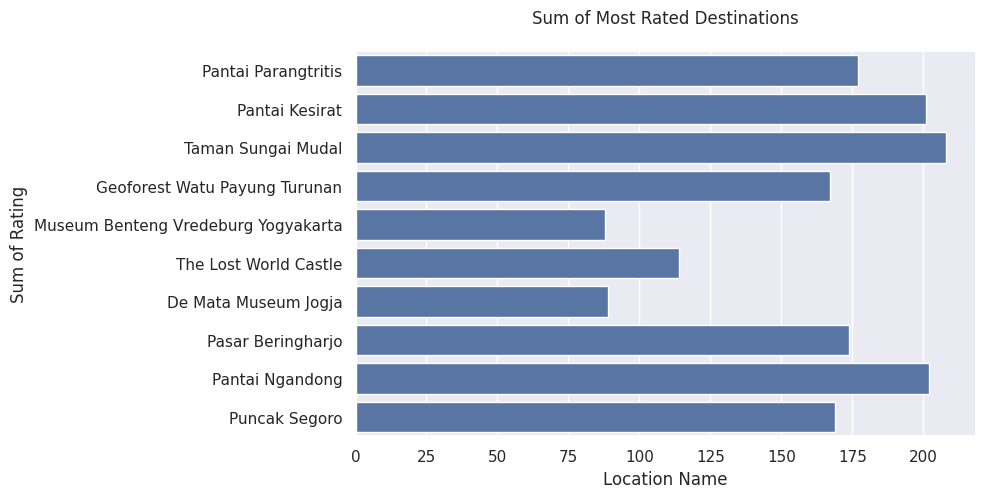

In [ ]:
# creating datafram that contains locations with most rating
top_10 = rating['Place_Id'].value_counts().reset_index()[0:10]
# Rename the 'index' column to 'Place_Id' for merging
top_10 = top_10.rename(columns={'index': 'Place_Id'})
top_10 = pd.merge(top_10, place[['Place_Id','Place_Name']], how='left', on='Place_Id') # Merge on 'Place_Id'

# creating visualization that contains most visited destinations
plt.figure(figsize=(8,5))
sns.barplot(x='Place_Id', y='Place_Name', data=top_10) # Use 'Place_Id' instead of 'Place_Id_x'
plt.title('Sum of Most Rated Destinations', pad=20)
plt.ylabel('Sum of Rating')
plt.xlabel('Location Name')
plt.show()

Destinasi dengan rating tertinggi yang pertama yaitu Taman Sungai Mudal, Pantai Ngandong, Pantai Kesirat, Pantai Parangtritis, dan Pasar Beringharjo.

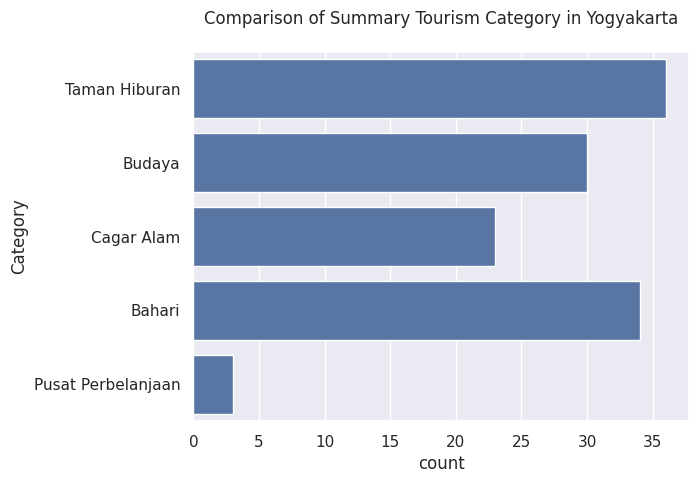

In [ ]:
# creating visualization of sum category for Yogyakarta destinations

sns.countplot(y='Category', data=place)
plt.title('Comparison of Summary Tourism Category in Yogyakarta', pad=20)
plt.show()

Kategori destinasi wisata dengan rating tertinggi yaitu Taman Hiburan, Bahari, dan Budaya. Sedangkan Pusat Perbelanjaan mendapatkan rating terendah.

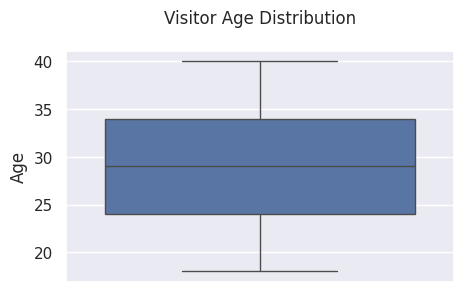

In [ ]:
# visualizing visitors distribution

plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Visitor Age Distribution', pad=20)
plt.show()

Terlihat distribusi usia pengunjung tidak terdapat outlier

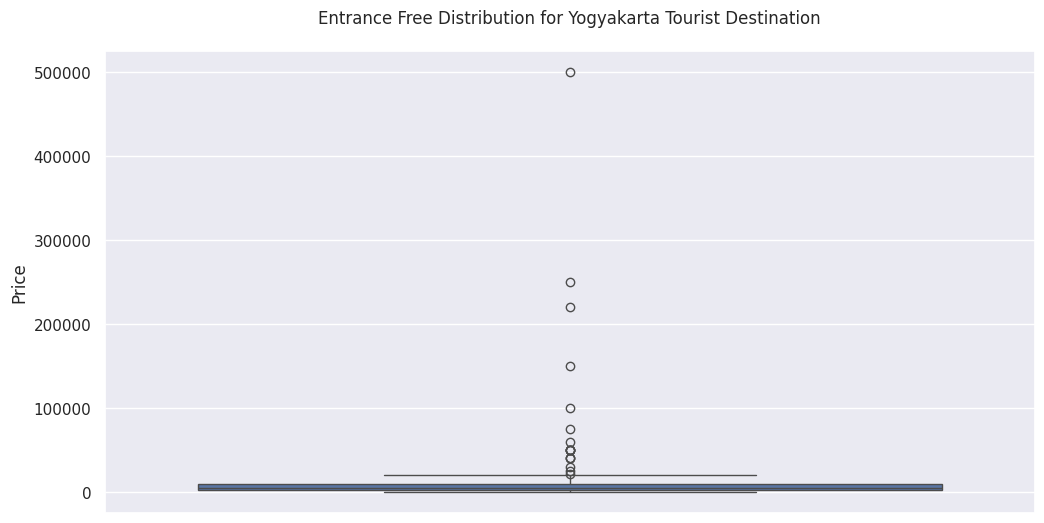

In [ ]:
# visualizing entrance fee range for destinations

plt.figure(figsize=(12,6))
sns.boxplot(place['Price'])
plt.title('Entrance Free Distribution for Yogyakarta Tourist Destination', pad=20)
plt.show()

Disini terlihat bahwa ada outlier dalam konteks harga tiket masuk bisa mengindikasikan adanya kesalahan input data, tarif khusus untuk kelompok tertentu, atau memang destinasi wisata tersebut menawarkan layanan atau fasilitas yang sangat berbeda dibandingkan dengan yang lain.

Data gabungan ini dapat berguna untuk berbagai analisis, seperti mengidentifikasi kategori populer, memahami pola pengeluaran, dan mengambil keputusan berdasarkan data

In [ ]:
# aggregating the Price and Time_Minutes for Category destination
place.groupby("Category").agg({"Price":["mean", "sum"],
                       "Time_Minutes":["mean", "sum"]})

Price         Time_Minutes        
                            mean     sum         mean     sum
Category                                                     
Bahari               7470.588235  254000    85.000000   510.0
Budaya              33083.333333  992500    79.666667  1195.0
Cagar Alam          31934.782609  734500    75.937500  1215.0
Pusat Perbelanjaan      0.000000       0    60.000000    60.0
Taman Hiburan       13069.444444  470500    78.409091  1725.0

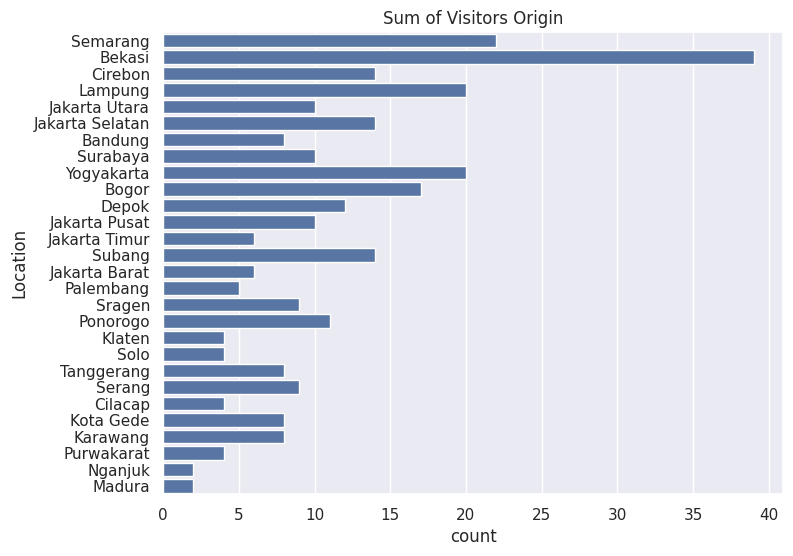

In [ ]:
# filtering city origin of visitors
askot = user['Location'].apply(lambda x : x.split(',')[0])

# visualizing city origin of visitors
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Sum of Visitors Origin')
plt.show()

Jumlah asal pengunjung yang terbanyak berasal dari daerah Bekasi kemudian Semarang. Sedangkan yang paling sedikit berasal dari Nganjuk dan juga Madura.

**Data Preparation**

In [ ]:
# reading dataset for encoding

df = rating.copy()
df.head()

,User_Id,Place_Id,Place_Ratings
0,2,85,4
1,23,85,4
2,25,85,2
3,39,85,5
4,43,85,4


**Encoding**

Melakukan encoding categorical features dan normalizing numerical features. Hal ini memastikan bahwa data berada dalam format yang sesuai untuk melatih model sistem rekomendasi.

In [ ]:
def dict_encoder(col, data=df):

  # changing column of dataframe into list with unique value
  unique_val = data[col].unique().tolist()

  # enumerating column value of dataframe
  val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}

  # encoding process from numbers to column value of dataframe
  val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
  return val_to_val_encoded, val_encoded_to_val

In [ ]:
# Encoding User_Id
user_to_user_encoded, user_encoded_to_user = dict_encoder('User_Id')

# Mapping User_Id into dataframe
df['user'] = df['User_Id'].map(user_to_user_encoded)

In [ ]:
# Encoding Place_Id
place_to_place_encoded, place_encoded_to_place = dict_encoder('Place_Id')

# Mapping Place_Id into dataframe place
df['place'] = df['Place_Id'].map(place_to_place_encoded)

In [ ]:
# getting length of user & place
num_users, num_place = len(user_to_user_encoded), len(place_to_place_encoded)

# changing rating into float
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)

# getting minimum and maximum rating
min_rating, max_rating = min(df['Place_Ratings']), max(df['Place_Ratings'])

print(f'Number of User: {num_users}, Number of Place: {num_place}, Min Rating: {min_rating}, Max Rating: {max_rating}')

Number of User: 300, Number of Place: 126, Min Rating: 1.0, Max Rating: 5.0


In [ ]:
# randomizing dataset
df = df.sample(frac=1, random_state=42)
df.head(2)

,User_Id,Place_Id,Place_Ratings,user,place
729,194,115,4.0,130,30
2067,276,176,2.0,23,91


**Modeling with RecomenderNet**

Dalam analisis ini, digunakan model regresi RecomenderNet.
RecomenderNet adalah model yang kuat dan fleksibel untuk membangun sistem rekomendasi yang efektif. Model ini mampu memberikan rekomendasi yang lebih personal, akurat, dan relevan dibandingkan dengan model tradisional.

Dataset ini dibagi menjadi set training dan testing dengan rasio 80:20

In [ ]:
# creating x variable for matching the user into one value
x = df[['user', 'place']].values

# crating y variable for initiatin the rating
y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# allocating data training 80% & data validation 20%
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

In [ ]:
class RecommenderNet(tf.keras.Model):

  # Function initialization
  def __init__(self, num_users, num_places, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_places = num_places
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.places_embedding = layers.Embedding( # layer embeddings places
        num_places,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.places_bias = layers.Embedding(num_places, 1) # layer embedding places bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # layer embedding 2
    places_vector = self.places_embedding(inputs[:, 1]) # layer embedding 3
    places_bias = self.places_bias(inputs[:, 1]) # layer embedding 4

    dot_user_places = tf.tensordot(user_vector, places_vector, 2)

    x = dot_user_places + user_bias + places_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_place, 50) # model initialization

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0004),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
 class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_root_mean_squared_error')<0.25):
      print('Fulfilled expected validation matrix')
      self.model.stop_training = True

In [ ]:
# begin the training

history = model.fit(
    x = x_train,
    y = y_train,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks = [myCallback()]
)

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.7034 - root_mean_squared_error: 0.3597 - val_loss: 0.7021 - val_root_mean_squared_error: 0.3472
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7000 - root_mean_squared_error: 0.3552 - val_loss: 0.7017 - val_root_mean_squared_error: 0.3469
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7037 - root_mean_squared_error: 0.3598 - val_loss: 0.7013 - val_root_mean_squared_error: 0.3467
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7164 - root_mean_squared_error: 0.3670 - val_loss: 0.7011 - val_root_mean_squared_error: 0.3465
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7088 - root_mean_squared_error: 0.3638 - val_loss: 0.7004 - val_root_mean_squared_error: 0.3460
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7041 - root_mean_squared_error: 0.3570 - val_loss: 0.7004 - val_root_mean_squared_error: 0.3461
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss:

Evaluasi menggunakan metriks root mean squared error dengan hasil 0.3195 dan val root mean squared error dengan hasil 0.3490

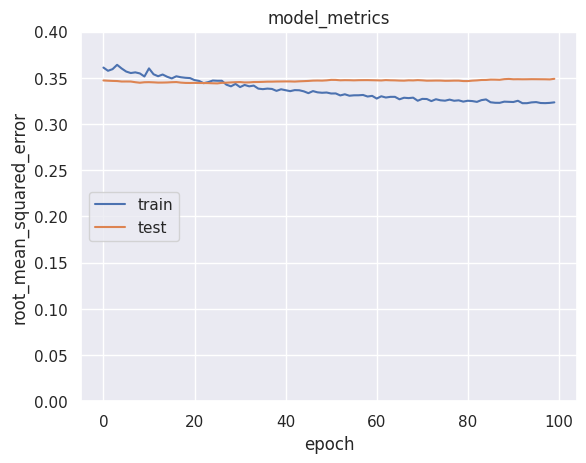

In [ ]:
# showing the plot loss and validation
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=0.4)
plt.legend(['train', 'test'], loc='center left')
plt.show()

**Predictions of Recomendation Destination**

In [ ]:
# dataframe preparation
place_df = place[['Place_Id','Place_Name','Category','Rating','Price']]
place_df.columns = ['id','place_name','category','rating','price']
df = rating.copy()

In [ ]:
# user sampling
user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

In [ ]:
# unvisited location data
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.Place_Id.values)]['id']
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)

place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

**Showing the Recomendation for Users**

In [ ]:
# top 7 recommendations
ratings = model.predict(user_place_array).flatten()
top_ratings_indices = ratings.argsort()[-7:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]

print('Recommendation list for: {}'.format('User ' + str(user_id)))
print('===' * 15,'\n')
print('----' * 15)
print('Places with highest rating from users')
print('----' * 15)

top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

place_df_rows = place_df[place_df['id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.place_name, ':', row.category)

print('')
print('----' * 15)
print('Top 7 place recommendations')
print('----' * 15)

recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
for row, i in zip(recommended_place.itertuples(), range(1,8)):
    print(i,'.', row.place_name, '\n    ', row.category, ',', 'Entrance Fee', row.price, ',', 'Rating', row.rating,'\n')

print('==='*15)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Recommendation list for: User 157

------------------------------------------------------------
Places with highest rating from users
------------------------------------------------------------
Taman Pintar Yogyakarta : Taman Hiburan
Gembira Loka Zoo : Cagar Alam
Bukit Bintang Yogyakarta : Taman Hiburan
Ledok Sambi : Cagar Alam
Pantai Ngandong : Bahari

------------------------------------------------------------
Top 7 place recommendations
------------------------------------------------------------
1 . Pantai Baron 
     Bahari , Entrance Fee 10000 , Rating 4.4 

2 . Pintoe Langit Dahromo 
     Cagar Alam , Entrance Fee 2500 , Rating 4.4 

3 . Pantai Wediombo 
     Bahari , Entrance Fee 5000 , Rating 4.5 

4 . Pantai Sedahan 
     Bahari , Entrance Fee 5000 , Rating 4.5 

5 . Desa Wisata Pulesari 
     Taman Hiburan , Entrance Fee 0 , Rating 4.4 

6 . Taman Sungai Mudal 
     Cagar Alam , Entrance Fee 10000 , Rating 4.6 

7 . Pantai Congot 
    

Hasil rekomendasi menampilkan top 7 destinasi sesuai dengan preferensi pengguna.